### Shray Garg

# To Explore Unsupervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

## Step 1: Loading data

Dataset https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [72]:
data = pd.read_csv('iris.csv')

In [73]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Data Preprocessing

In [74]:
data = data.drop('Species', axis=1)
data = data.drop('Id', axis=1)

In [75]:
data.isnull().sum().sum()

0

In [76]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

## Step 3: Data Visualization

In [77]:
# To find the optimum number of clusters: 
squared_distances = []

K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    squared_distances.append(k_means.inertia_)

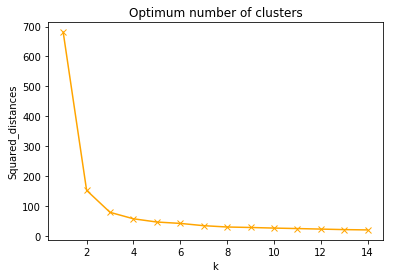

In [78]:
plt.plot(K, squared_distances, 'bx-', color='orange')
plt.title('Optimum number of clusters')
plt.xlabel('k')
plt.ylabel('Squared_distances')
plt.show()

#### This is known as the `elbow method`. 3 is the optimum number of clusters because we can `visualize` an elbow like bending line at `k=3`

## Step 4: Data Modelling

In [79]:
data = data.iloc[:, [0, 1, 2, 3]].values

In [80]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(data)

In [81]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualising the clusters

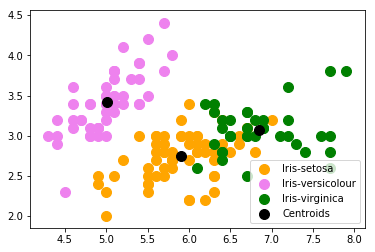

In [84]:
plt.scatter(data[y_pred == 0, 0], data[y_pred == 0, 1], 
            s = 100, c = 'Orange', label = 'Iris-setosa')
plt.scatter(data[y_pred == 1, 0], data[y_pred == 1, 1], 
            s = 100, c = 'Violet', label = 'Iris-versicolour')
plt.scatter(data[y_pred == 2, 0], data[y_pred == 2, 1],
            s = 100, c = 'Green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Black', label = 'Centroids')

plt.legend()

### End of the notebook.

# Thanks!